<a href="https://colab.research.google.com/github/shk0349/AI_Study_24/blob/master/Data_%EC%A0%84%EC%B2%98%EB%A6%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

올바른 결과 도출을 위해서 데이터를 사용하기 전에 데이터 전처리 과정을 거침

전처리 과정을 거친 데이터로 훈련하였을경우 차이를 알고 표준점수로 특성의 스케일 변환 실행

만약 길이가 25cm이고 무게가 150g이면 도미라고 가정하였는데, 빙어로 결론이 나왔음...;;;;;

In [90]:
# 앞쪽 35개는 도미(1), 뒷쪽 14개는 빙어(0) -> 총 49개
fish_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0,
               31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0,
               35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0, 9.8,
               10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]

fish_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0,
               500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0,
               700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0, 6.7,
               7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

In [91]:
import numpy as np
np.column_stack(([1, 2, 3], [4, 5, 6]))    # .column(열)_stack(쌓다)

array([[1, 4],
       [2, 5],
       [3, 6]])

In [92]:
fish_data = np.column_stack((fish_length, fish_weight))    # fish_data 변수에 2차원 배열을 넣음(길이, 무게)
print(fish_data[:5])    # fish_data의 앞쪽 5개 정보 확인

[[ 25.4 242. ]
 [ 26.3 290. ]
 [ 26.5 340. ]
 [ 29.  363. ]
 [ 29.  430. ]]


In [93]:
# 정답파일 생성
print(np.ones(5))

[1. 1. 1. 1. 1.]


In [94]:
print(np.zeros(10))

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [95]:
fish_target = np.concatenate((np.ones(35), np.zeros(14)))    # 1차원배열(1이 35개 0이 14개)
print(fish_target)

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0.]


In [96]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(fish_data, fish_target, stratify = fish_target, random_state = 42)
print(train_input.shape, test_input.shape)
# train_input : 훈련용 입력값
# test_input : 테스트용 입력값
# train_target : 훈련용 정답
# test_target : 테스트용 정답
# stratify : target값을 넣어줌(target의 class 비율을 유지한채 데이터셋을 split함)
# random_state : 시드값을 지정하고 랜덤적용(수업용..;;)

(36, 2) (13, 2)


In [97]:
print(train_target.shape, test_target.shape)    # 결과가 튜플로 나옴

(36,) (13,)


In [98]:
print(test_target)

[0. 0. 1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1.]


In [99]:
from sklearn.neighbors import KNeighborsClassifier    # k-이웃 근접 알고리즘
kn = KNeighborsClassifier()    # 객체생성
kn.fit(train_input, train_target)    # 훈련(트레이닝 입력, 트레이닝 정답)

KNeighborsClassifier()

In [100]:
kn.score(test_input, test_target)    # 평가(테스트 입력, 테스트 정답)

1.0

In [101]:
print(kn.predict([[25, 150]]))    # 도미 25cm, 150g 처리 결과 -> 0(빙어)

[0.]


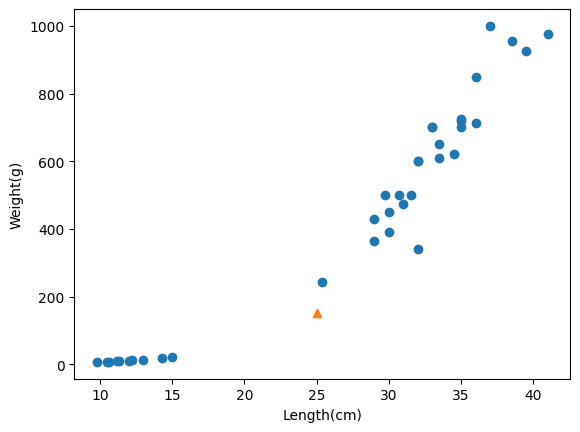

In [102]:
# 그래프로 확인
import matplotlib.pyplot as plt
plt.scatter(train_input[:, 0], train_input[:, 1])
plt.scatter(25, 150, marker = '^')    # 마커 종류 변경 시 해당 url 참고 / https://pyvisuall.tistory.com/39
plt.xlabel("Length(cm)")
plt.ylabel("Weight(g)")
plt.show()

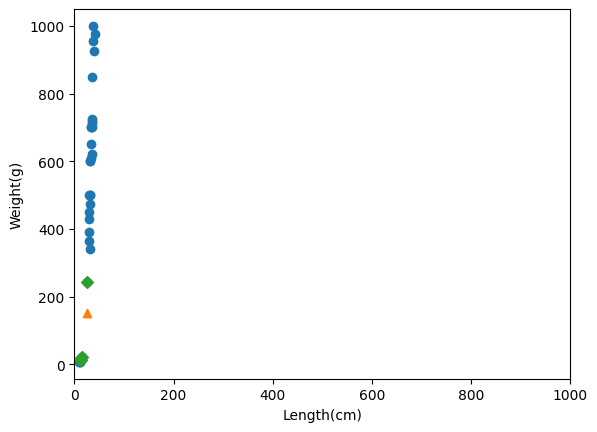

In [103]:
# 결론 : x축과 y축의 비율일 다르므로 그래프로 정확히 판단불가
# k-근접 이웃 알고리즘은 주변에 있는 5개를 보기 때문에 조금더 알아볼 필요가 있음...

distances, indexes = kn.kneighbors([[25, 150]])    # 내가 알고 싶은 값의 거리와 인덱스를 구함

plt.scatter(train_input[:, 0], train_input[:, 1])    # 입력 데이터의 값
plt.scatter(25, 150, marker = '^')    # 알고 싶은 값
plt.scatter(train_input[indexes, 0], train_input[indexes, 1], marker='D')    # 이웃의 값
plt.xlim((0, 1000))    # x축의 범위를 0 ~ 1000까지로 설정
plt.xlabel("Length(cm)")
plt.ylabel("Weight(g)")
plt.show()    # 결론 : 25, 150에 대한 이웃이 녹색으로 표시됨

In [104]:
print(train_input[indexes])    # k-최근접 알고리즘 상 가장 근접한 5개의 값(도미 1, 빙어 4)

[[[ 25.4 242. ]
  [ 15.   19.9]
  [ 14.3  19.7]
  [ 13.   12.2]
  [ 12.2  12.2]]]


In [105]:
print(train_target[indexes])    # 도미 1, 빙어 4

[[1. 0. 0. 0. 0.]]


In [106]:
print(distances)

[[ 92.00086956 130.48375378 130.73859415 138.32150953 138.39320793]]


In [107]:
# 평균을 구하라(가장 널리 사용하는 전처리 방법 : 표준점수, z점수라고 함)
# 표준점수는 각 특성값이 평균에서 표준편차의 몇배만큼 떨어져 있는지를 나타냄
# 분산은 데이터에서 평균을 뺀 값을 모두 제곱한 다음 평균을 내어 구함
# 표준편차는 분산의 제곱근으로 데이터가 분산된 정도를 나타냄
# 표준점수는 각 데이터가 원점에서 몇 표준편차만큼 떨어져 있는지를 나타내는 값

mean = np.mean(train_input, axis = 0)    # 평균값, axis : 중심선
std = np.std(train_input, axis = 0)    # 표준편차
# train_input -> 36개의 요소와 2개의 특성을 가짐
# 행을 따라 각 열의 통계값을 계산함
print(mean, std)

[ 27.29722222 454.09722222] [  9.98244253 323.29893931]


In [108]:
# 원본데이터에서 평균을 빼고 표준편차로 나누어 표준점수 변환
train_scaled = (train_input - mean) / std    # 표준점수 공식
# 원본데이터에서 평균으로 빼고 표준편차로 나눔
# 넘파이는 train_input의 모든 행에서 mean에 있는 두 평균 값을 빼준다
# std에 있는 두 표준편차를 다시 모든 행에 적용(broadcasting / 브로드캐스팅)

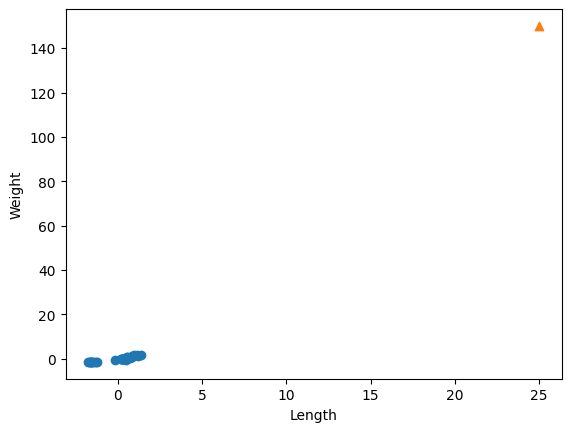

In [109]:
# 전처리 데이터를 이용하여 모델 훈련
plt.scatter(train_scaled[:, 0], train_scaled[:, 1])
plt.scatter(25, 150, marker = '^')
plt.xlabel("Length")
plt.ylabel("Weight")
plt.show()
# 전처리된 데이터는 표준점수를 위하여 값이 축소되었는데 알고자 하는 값은 표준점수화가 안되어있음
# 훈련세트를 평균으로 뺴고 표준편차로 나누어 주었기 때문에 값의 범위가 달라짐

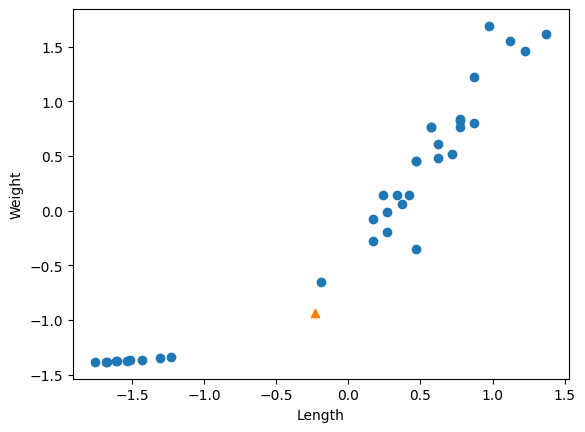

In [110]:
# 동일한 기준으로 샘플 변환하고 출력
new = ([25, 150] - mean) / std
plt.scatter(train_scaled[:, 0], train_scaled[:, 1])
plt.scatter(new[0], new[1], marker = '^')    # 배열로 생성하고 표준편차 적용 후 추가데이터
plt.xlabel("Length")
plt.ylabel("Weight")
plt.show()
# x축과 y축의 범위가 비슷함(-1.5 ~ 1.5 사이 값)

In [111]:
# 표준점수로 훈련
kn.fit(train_scaled, train_target)

KNeighborsClassifier()

In [112]:
# 테스트값도 표준점수화
test_scaled = (test_input - mean) / std

In [113]:
kn.score = (test_scaled, test_target)    # 평가 진행
print(kn.predict([new]))    # 25, 150짜리 결과로 진행
# 값이 1로 도미로 예측 성공

[1.]


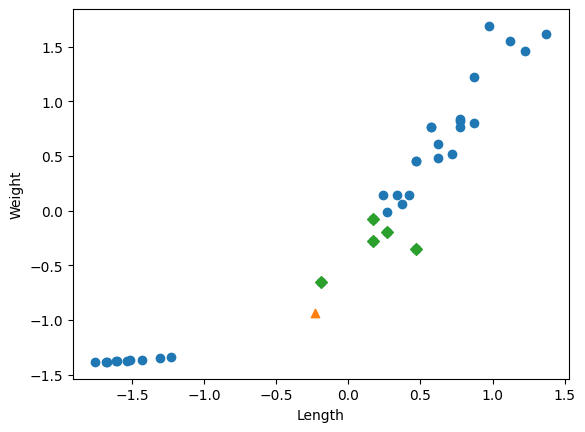

In [114]:
# kneighbors()로 최근접 이웃을 구한 다음 산점도로 그려봄
distances, indexes = kn.kneighbors([new])
plt.scatter(train_scaled[:, 0], train_scaled[:, 1])
plt.scatter(new[0], new[1], marker='^')
plt.scatter(train_scaled[indexes, 0], train_scaled[indexes, 1], marker='D')
plt.xlabel("Length")
plt.ylabel("Weight")
plt.show()